## IBM Data Science Professional Certificate Capstone Project

March 2021

## Table of Contents
### [1.Introduction](#1introduction)
### [2.Data](#2data)
### [3.Demographics analysis of San Francisco census tracts](#3demographicsanalysis) 

## 1. Introduction  <a name="1introduction"></a>

The goal of this project will be to find the best location for a Mexican restaurant in San Francisco, CA. As defined by the Investor this will be a restaurant aimed mainly at 30-49 year old clientele with income above 100k$ per annum. One of the main attractions will be the high quality of the food. At first we assume the the main customers will be the inhabitants of the neighboring areas, with a strong emphasis on clients with Mexican origin. 

Firstly I will analyse the the demographics of San Francisco to identify the market area with the optimum clientele base inline with the above assumptions. 
Secondly I will look into the selected area, examine the competition and pinpoint a more precise location.


## 2. Data <a name="2data"></a>

I will use census tracts data obtained from openICPSR for the demographics analysis of the San Francisco - (National Neighborhood Data Archive (NaNDA): Socioeconomic Status and Demographic Characteristics of Census Tracts, United States, 2008-2017). ICPSR is an Inter-university Consortium for Political and Social Research.
Machine learning clustering on the relevant census tracts data will be carried out to identify the preferable neighboorhood.
The key data used to cluster the tracts will be:
* the average number of the population with income above 100k$ per year per square mile,  
* the average number of the Hispanic population per square mile- according to Wikipedia the majority of Hispanic population in SanFrancisco are of Mexican origin,
* the average number of the 30-49 year old population per square mile,

The geojson census tracts file used for the maps was obtained from Metropolitan Transportation Commission (MTC) website, the transportation planning, coordinating and financing agency for the nine-county San Francisco Bay Area.

Information about the the competition in the selected area will be obtained with the Foursquare API. Two key factors will analysed using this data:
* location of other Mexican restaurants - the restaurant should be located as far as possible from the direct competitors,
* location of other restaurants - locating the restaurant next to other restaurants which are not direct competitors could be even beneficial (poossiblity of taking over their clients).

## 3. Demographics analysis of San Francisco census tracts. <a name="3demographicsanalysis"></a>

In [1]:
import pandas as pd
import numpy as np


#### Reading information about California census tracts.

In [2]:
ca_tracts=pd.read_csv('2019_gaz_tracts_06.txt',delimiter='\t',dtype={'GEOID': str})
ca_tracts

,USPS,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,CA,06001400100,6894339,0,2.662,0.000,37.867627,-122.231946
1,CA,06001400200,586559,0,0.226,0.000,37.848138,-122.249592
2,CA,06001400300,1105851,0,0.427,0.000,37.840597,-122.254440
3,CA,06001400400,715630,0,0.276,0.000,37.848281,-122.257448
4,CA,06001400500,590297,0,0.228,0.000,37.848541,-122.264728
...,...,...,...,...,...,...,...,...
8052,CA,06115040800,109401417,128316,42.240,0.050,39.041053,-121.433980
8053,CA,06115040901,263652570,4473094,101.797,1.727,39.139743,-121.582340
8054,CA,06115040902,93617079,240059,36.146,0.093,39.119345,-121.399584
8055,CA,06115041000,468397390,6927408,180.849,2.675,39.266189,-121.445373


#### Subsetting information about California census tracts to San Francisco tracts.


In [3]:
ca_tracts['trint']=ca_tracts['GEOID'].astype(int)
sf_tracts=ca_tracts[(ca_tracts['trint']<=6075990100) & (ca_tracts['trint']>=6075010100)]
sf_tracts.drop(columns=['trint'],inplace=True)
sf_tracts.reset_index(drop=True,inplace=True)

sf_tracts.rename(columns={'INTPTLAT':'Lat',
                          'INTPTLONG                                                                                                                             ':'Lon'},inplace=True)
#sf_tracts['Tract Code']=sf_tracts['Tract Code']-6075000000
sf_tracts.drop(columns='USPS',inplace=True)
sf_tracts

/home/vladdie/miniconda3/envs/cap/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/vladdie/miniconda3/envs/cap/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,GEOID,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,Lat,Lon
0,06075010100,776490,646917,0.300,0.250,37.808520,-122.409554
1,06075010200,515957,295388,0.199,0.114,37.805861,-122.422925
2,06075010300,268266,0,0.104,0.000,37.801620,-122.415681
3,06075010400,335744,0,0.130,0.000,37.802273,-122.407558
4,06075010500,683605,494314,0.264,0.191,37.802684,-122.399050
...,...,...,...,...,...,...,...
192,06075980401,419323,247501289,0.162,95.561,37.727239,-123.032229
193,06075980501,1577311,9769,0.609,0.004,37.716208,-122.419346
194,06075980600,2132298,2016110,0.823,0.778,37.723166,-122.368542
195,06075980900,3585240,260707,1.384,0.101,37.746286,-122.389477


#### Reading information about the demographics of San Francisco census tracts in terms of:
#### 1. Persons per square mile, ACS 2013-2017 (popden13_17)
#### 3. Proportion of people of Hispanic origin, ACS 2013-2017 (phispanic13_17)
#### 3. Proportion of families with income greater than 100K, ACS 2013-2017 (inc_above_100k)
#### 4. Proportion of population 30-49 years of age, ACS 2013-2017 (30-39_pop)



In [4]:
pd.set_option('display.max_rows', 10)
demogr=pd.read_csv('nanda_ses_tract_2008-2017_04P.csv',dtype={'tract_fips10':str})
demogr['trint']=demogr['tract_fips10'].astype(int)
demogr_sf=demogr[(demogr['trint']<=6075990100) & (demogr['trint']>=6075010100)]
demogr.drop(columns=['trint'],inplace=True)
demogr_sf.reset_index(drop=True,inplace=True)
demogr_sf=demogr_sf.fillna(0)
demogr_sf.columns
demogr_sf_res=demogr_sf[['tract_fips10','popden13_17','phispanic13_17','pin5b_13_17','p30_3913_17','p40_4913_17']]
demogr_sf_res['30-49_pop']=demogr_sf_res['p30_3913_17']+demogr_sf_res['p40_4913_17']
demogr_sf_res.drop(columns=['p30_3913_17','p40_4913_17'],inplace=True)
demogr_sf_res.rename(columns={'pin5b_13_17':'inc_above_100k'},inplace=True)
demogr_sf_res.rename(columns={'tract_fips10':'trctid'},inplace=True)
demogr_sf_res

<ipython-input-4-171e034d1311>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  demogr_sf_res['30-49_pop']=demogr_sf_res['p30_3913_17']+demogr_sf_res['p40_4913_17']
/home/vladdie/miniconda3/envs/cap/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/home/vladdie/miniconda3/envs/cap/lib/python3.9/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pa

,trctid,popden13_17,phispanic13_17,inc_above_100k,30-49_pop
0,06075010100,13232.0900,0.070078,0.430274,0.394505
1,06075010200,21917.6300,0.030713,0.705506,0.366262
2,06075010300,42257.9700,0.092529,0.510823,0.387252
3,06075010400,35832.9800,0.117330,0.696329,0.435307
4,06075010500,10194.5400,0.106652,0.635531,0.316983
...,...,...,...,...,...
192,06075980401,0.0000,0.000000,0.000000,0.000000
193,06075980501,1277.7750,0.187980,0.312500,0.148338
194,06075980600,623.1144,0.173489,0.406250,0.249513
195,06075980900,174.7661,0.239669,0.625000,0.632231


In [5]:
demogr_sf_res.describe()

,popden13_17,phispanic13_17,inc_above_100k,30-49_pop
count,197.000000,197.000000,197.000000,197.000000
mean,30705.343058,0.150408,0.539242,0.339857
std,22463.860966,0.118301,0.220854,0.089740
min,0.000000,0.000000,0.000000,0.000000
25%,19862.460000,0.065402,0.381136,0.279339
50%,26842.250000,0.111238,0.567935,0.335698
75%,36030.870000,0.191804,0.705506,0.405110
max,156680.800000,0.617953,0.947226,0.632231


In [6]:
demogr_sf_res.dtypes

trctid             object
popden13_17       float64
phispanic13_17    float64
inc_above_100k    float64
30-49_pop         float64
dtype: object

#### Calculating the the average number of persons of Hispanic origin, with income above 100k$ and aged 30-49 per square mile for each census tract.

In [34]:
demogr_sf_res_avg=pd.DataFrame()
demogr_sf_res_avg['trctid']=demogr_sf_res['trctid']
demogr_sf_res_avg['avg_hisp']=demogr_sf_res['popden13_17']*demogr_sf_res['phispanic13_17']
demogr_sf_res_avg['avg_inc_above_100k']=demogr_sf_res['popden13_17']*demogr_sf_res['inc_above_100k']
demogr_sf_res_avg['avg_30-49_pop']=demogr_sf_res['popden13_17']*demogr_sf_res['30-49_pop']
demogr_sf_res_avg

,trctid,avg_hisp,avg_inc_above_100k,avg_30-49_pop
0,06075010100,927.280282,5693.425998,5220.121250
1,06075010200,673.152074,15463.014831,8027.589366
2,06075010300,3910.093326,21586.323342,16364.464002
3,06075010400,4204.300087,24951.551587,15598.339407
4,06075010500,1087.266095,6478.947501,3231.491081
...,...,...,...,...
192,06075980401,0.000000,0.000000,0.000000
193,06075980501,240.195549,399.304688,189.542075
194,06075980600,108.103664,253.140225,155.474939
195,06075980900,41.886091,109.228813,110.492619


#### In the next step we will cluster the census tracts using Kmeans algorithm considering the above data in order to find the optimal market area for the restaurant.

In [35]:
train_data=demogr_sf_res_avg.iloc[:,1:]

In [9]:
train_data

,avg_hisp,avg_inc_above_100k,avg_30-49_pop
0,927.280282,5693.425998,5220.121250
1,673.152074,15463.014831,8027.589366
2,3910.093326,21586.323342,16364.464002
3,4204.300087,24951.551587,15598.339407
4,1087.266095,6478.947501,3231.491081
...,...,...,...
192,0.000000,0.000000,0.000000
193,240.195549,399.304688,189.542075
194,108.103664,253.140225,155.474939
195,41.886091,109.228813,110.492619


In [36]:
from sklearn.compose import  ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
ct=ColumnTransformer([('scaler',MinMaxScaler(),['avg_hisp','avg_inc_above_100k','avg_30-49_pop'])])
scaled_td=ct.fit_transform(train_data)
from sklearn.cluster import KMeans
kms=KMeans(n_clusters=6,random_state=5).fit(scaled_td)
labels=kms.labels_
labels[0:10]

array([0, 5, 1, 1, 0, 5, 5, 1, 1, 1], dtype=int32)

We will evaluate what is the optimal number of clusters using the yellowbrick silhuette visualizer.

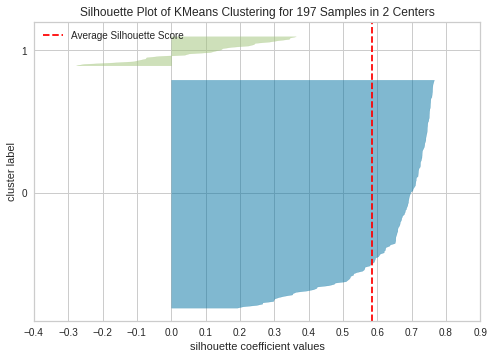

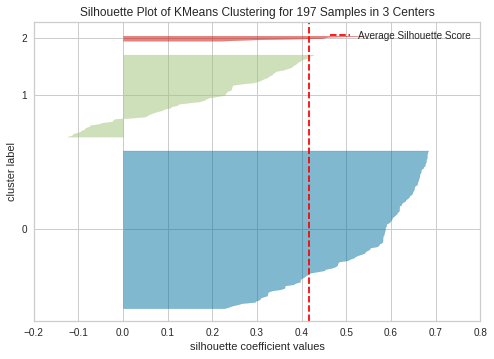

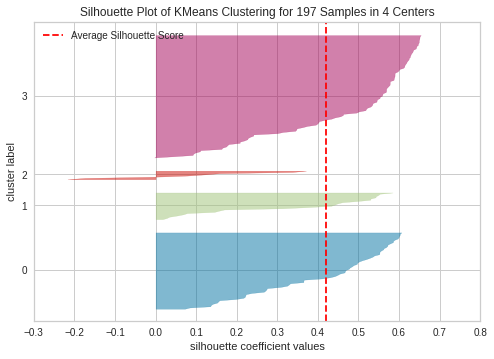

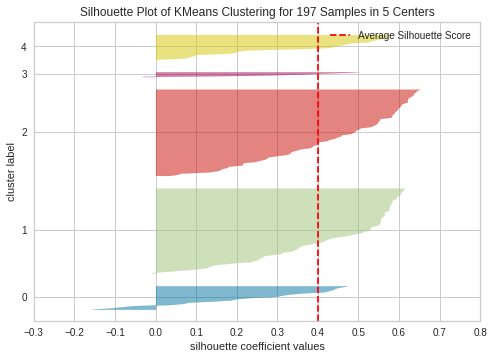

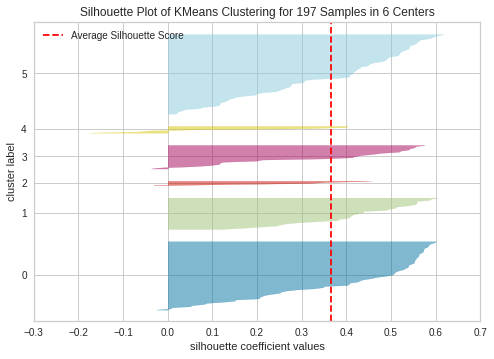

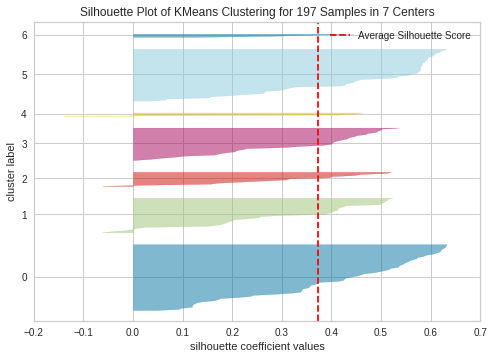

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer

for k in range(2,8):
    kms=KMeans(n_clusters=k,random_state=5)
    visualizer = SilhouetteVisualizer(kms, colors='yellowbrick')
    visualizer.fit(scaled_td)
    visualizer.show()

#### As we can see the highest silhuette score average score achieved the 2 cluster option but it is unlikely we can find a cluster that would fit our requirements in this case.
#### Let us evaluate options with 4, 6 and 7 clusters which look promising as they have relatively high average silhouette coefficient score, with a relatively low number of wrongly assigned samples to clusters (negative silhuouette coefficient scores) and large enough number of clusters to fulfill our requirements in terms of demographics.

In [37]:
demogr_sf_res_avg['clusters6']=labels
demogr_sf_res_avg

,trctid,avg_hisp,avg_inc_above_100k,avg_30-49_pop,clusters6
0,06075010100,927.280282,5693.425998,5220.121250,0
1,06075010200,673.152074,15463.014831,8027.589366,5
2,06075010300,3910.093326,21586.323342,16364.464002,1
3,06075010400,4204.300087,24951.551587,15598.339407,1
4,06075010500,1087.266095,6478.947501,3231.491081,0
...,...,...,...,...,...
192,06075980401,0.000000,0.000000,0.000000,0
193,06075980501,240.195549,399.304688,189.542075,0
194,06075980600,108.103664,253.140225,155.474939,0
195,06075980900,41.886091,109.228813,110.492619,0


In [15]:
demogr_sf_res_avg.describe()

,avg_hisp,avg_inc_above_100k,avg_30-49_pop,clusters
count,197.000000,197.000000,197.000000,197.000000
mean,4944.686772,15457.786199,10577.024629,2.502538
std,6420.243833,10152.912164,8075.466483,2.172707
min,0.000000,0.000000,0.000000,0.000000
25%,1450.268496,9008.583807,5873.239622,0.000000
50%,2914.469614,13853.137914,9203.147634,3.000000
75%,5439.174669,20435.035732,13164.907394,5.000000
max,39646.417008,67092.308299,57851.690639,5.000000


In [38]:
kms4=KMeans(n_clusters=4,random_state=5).fit(scaled_td)
labels4=kms4.labels_

demogr_sf_res_avg['clusters4']=labels4


In [47]:
kms5=KMeans(n_clusters=5,random_state=5).fit(scaled_td)
labels5=kms5.labels_

demogr_sf_res_avg['clusters5']=labels5

In [50]:
kms7=KMeans(n_clusters=7,random_state=5).fit(scaled_td)
labels7=kms7.labels_

demogr_sf_res_avg['clusters7']=labels7


In [21]:
demogr_sf_res_avg.groupby('clusters4').mean().iloc[:,:-2].style.background_gradient(cmap=cm)

,avg_hisp,avg_inc_above_100k,avg_30-49_pop
clusters4,,,
0,3259.279785,23805.715579,13669.172613
1,13367.219643,13753.471802,13786.097394
2,26468.671631,35608.711446,37312.973654
3,2414.842774,9023.711188,5816.301720


In [48]:
import seaborn as sns
cm=sns.light_palette('green',as_cmap=True)
demogr_sf_res_avg.groupby('clusters5').mean().iloc[:,:-3].style.background_gradient(cmap=cm)

,avg_hisp,avg_inc_above_100k,avg_30-49_pop
clusters5,,,
0,6078.701810,34534.000610,21073.726591
1,2286.674484,7073.561940,4507.464124
2,2807.274276,18384.065273,10829.134052
3,34314.647883,25064.500605,41358.848581
4,13414.447004,13290.858474,13117.906892


In [42]:
import seaborn as sns
cm=sns.light_palette('green',as_cmap=True)
demogr_sf_res_avg.groupby('clusters6').mean().iloc[:,:-3].style.background_gradient(cmap=cm)

,avg_hisp,avg_inc_above_100k,avg_30-49_pop
clusters6,,,
0,2075.500682,6086.089479,4114.649104
1,3338.637667,27540.552630,15580.194059
2,34314.647883,25064.500605,41358.848581
3,13414.447004,13290.858474,13117.906892
4,10299.084483,41619.434897,28195.208875
5,2914.126313,16112.678800,9499.796156


In [52]:
demogr_sf_res_avg.groupby('clusters7').mean().iloc[:,:-3].style.background_gradient(cmap=cm)

,avg_hisp,avg_inc_above_100k,avg_30-49_pop
clusters7,,,
0,2330.871411,16812.167790,9586.706066
1,4102.918957,27338.502653,16333.033161
2,17459.715456,14998.777023,15974.136810
3,6632.344361,10210.948842,8080.932459
4,11193.239330,49863.780457,29792.675621
5,1274.249585,5405.837411,3461.443498
6,34235.765618,27448.860841,46844.931528


#### In case of the 6 clusters option cluster nr 4 is most preferable as it has the largest number inhabitants of Hispanic origin, with income above 100k and average 20-49 population per square mile.

#### In case of the 4 clusters option cluster nr 3 is most preferable.

#### In case of the 7 clusters option cluster nr 3 is most preferable.

In [23]:
clust_comp=demogr_sf_res_avg.groupby('clusters4').mean().iloc[[3],:3].reset_index(drop=True)
clust_comp['clusters_nr']=4
clust_comp

,avg_hisp,avg_inc_above_100k,avg_30-49_pop,clusters_nr
0,2414.842774,9023.711188,5816.30172,4


In [ ]:
clust_comp=demogr_sf_res_avg.groupby('clusters5').mean().iloc[[3],:3].reset_index(drop=True)
clust_comp['clusters_nr']=4
clust_comp

In [24]:
clust_comp=clust_comp.append(demogr_sf_res_avg.groupby('clusters6').mean().iloc[[4],:3].reset_index(drop=True)).reset_index(drop=True)
clust_comp['clusters_nr'].iloc[1]=6
clust_comp

,avg_hisp,avg_inc_above_100k,avg_30-49_pop,clusters_nr
0,2414.842774,9023.711188,5816.301720,4.0
1,10299.084483,41619.434897,28195.208875,6.0


In [25]:
demogr_sf_res_avg.groupby('clusters4').count()

,trctid,avg_hisp,avg_inc_above_100k,avg_30-49_pop,clusters,clusters7
clusters4,,,,,,
0,64,64,64,64,64,64
1,23,23,23,23,23,23
2,8,8,8,8,8,8
3,102,102,102,102,102,102


In [26]:
clust_comp=clust_comp.append(demogr_sf_res_avg.groupby('clusters7').mean().iloc[[3],:3].reset_index(drop=True)).reset_index(drop=True)
clust_comp['clusters_nr'].iloc[2]=7
clust_comp['clusters_nr']=clust_comp['clusters_nr'].astype('int')
clust_comp

,avg_hisp,avg_inc_above_100k,avg_30-49_pop,clusters_nr
0,2414.842774,9023.711188,5816.301720,4
1,10299.084483,41619.434897,28195.208875,6
2,6632.344361,10210.948842,8080.932459,7


<AxesSubplot:xlabel='population_demogr'>

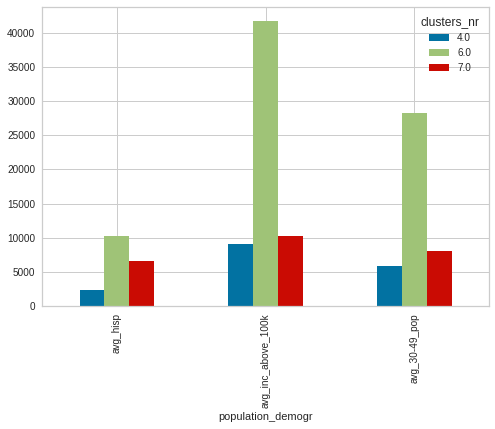

In [27]:
clust_comp=clust_comp.transpose()
clust_comp.columns=clust_comp.iloc[-1,:]
clust_comp.drop(clust_comp.index[-1],inplace=True)
clust_comp.index.name='population_demogr'
clust_comp.plot(kind='bar')

#### In case of clustering in 4 clusters the most prefered cluster has fewer average number of inhabitants per sqaure mile that fulfill our requirements then the best cluster in the 6 and 7 clusters options. Considering the 6 and 7 cluster options have the same average number of inhabitants per square mile that meet our prerequisites we will select the option with 6 clusters.   

In [28]:
#html template code for map legend
template = """
{% macro html(this, kwargs) %}

<!doctype html>
<html lang="en">
<head>
  <meta charset="utf-8">
  <meta name="viewport" content="width=device-width, initial-scale=1">
  <title>jQuery UI Draggable - Default functionality</title>
  <link rel="stylesheet" href="//code.jquery.com/ui/1.12.1/themes/base/jquery-ui.css">

  <script src="https://code.jquery.com/jquery-1.12.4.js"></script>
  <script src="https://code.jquery.com/ui/1.12.1/jquery-ui.js"></script>
  
  <script>
  $( function() {
    $( "#maplegend" ).draggable({
                    start: function (event, ui) {
                        $(this).css({
                            right: "auto",
                            top: "auto",
                            bottom: "auto"
                        });
                    }
                });
});

  </script>
</head>
<body>

 
<div id='maplegend' class='maplegend' 
    style='position: absolute; z-index:9999; border:2px solid grey; background-color:rgba(255, 255, 255, 0.8);
     border-radius:6px; padding: 10px; font-size:14px; right: 20px; bottom: 20px;'>
     
<div class='legend-title'>Legend (draggable!)</div>
<div class='legend-scale'>
  <ul class='legend-labels'>
    <li><span style='background:red;opacity:0.7;'></span>Big</li>
    <li><span style='background:orange;opacity:0.7;'></span>Medium</li>
    <li><span style='background:green;opacity:0.7;'></span>Small</li>

  </ul>
</div>
</div>
 
</body>
</html>

<style type='text/css'>
  .maplegend .legend-title {
    text-align: left;
    margin-bottom: 5px;
    font-weight: bold;
    font-size: 90%;
    }
  .maplegend .legend-scale ul {
    margin: 0;
    margin-bottom: 5px;
    padding: 0;
    float: left;
    list-style: none;
    }
  .maplegend .legend-scale ul li {
    font-size: 80%;
    list-style: none;
    margin-left: 0;
    line-height: 18px;
    margin-bottom: 2px;
    }
  .maplegend ul.legend-labels li span {
    display: block;
    float: left;
    height: 16px;
    width: 30px;
    margin-right: 5px;
    margin-left: 0;
    border: 1px solid #999;
    }
  .maplegend .legend-source {
    font-size: 80%;
    color: #777;
    clear: both;
    }
  .maplegend a {
    color: #777;
    }
</style>
{% endmacro %}"""

In [30]:
import folium
import branca.colormap as cmp
clusters=demogr_sf_res_avg.set_index('trctid')['clusters']
step = cmp.StepColormap(
 ['purple','red','yellow','blue','green','cyan'],
 vmin=0, vmax=6,
 index=[0,1, 2, 3, 4 ,5,6],  #for change in the colors, not used fr linear
 caption='Clusters'    #Caption for Color scale or Legend
)
sanmap=folium.Map(zoom_start=13,location=[37.77,-122.42])
folium.GeoJson(sanmap,style_function=lambda feature: {
    'fillColor':step(clusters[feature['properties']['trctid']]),
    'fillOpacity':0.5,
    'color':'black', #border color for the color fills
    'weight':1, #how thick the border has to be
    'dashArray': '5,3' #dashed lines length,space between them
}).add_to(sanmap)

step.add_to(sanmap) 
from branca.element import Template, MacroElement

macro = MacroElement()
macro._template = Template(template)

sanmap.get_root().add_child(macro)
sanmap

ValueError: Cannot render objects with any missing geometries: <folium.folium.Map object at 0x7f12f2539a60>

In [ ]:
scaled_df=pd.DataFrame(scaled_td,columns=['avg_hisp','avg_inc_above_100k','avg_30-40_pop'])
scaled_df['tractid']=demogr_sf_res_avg['trctid']
scaled_df

In [ ]:
scaled_df['suitability']=scaled_df['avg_inc_above_100k']*0.45+scaled_df['avg_hisp']*0.35+scaled_df['avg_30-40_pop']*0.2
scaled_df['tractid']=demogr_sf_res_avg['trctid']
scaled_df['clusters']=demogr_sf_res_avg['clusters']
scaled_df

In [ ]:
pd.set_option('display.max_rows', 20)
scaled_df.sort_values(by='suitability',ascending=False).head(20)

In [ ]:
scaled_df.groupby('clusters').mean()

In [ ]:
scaled_df.describe()

In [ ]:
scaled_df

In [ ]:
import folium

sanmap=folium.Map(zoom_start=13,location=[37.77,-122.42])
sanmap.choropleth(geo_data=geosan,data=scaled_df,columns=['tractid','suitability'],
                  key_on='feature.properties.trctid',fill_color='YlOrRd',legend_name="Suitability",fill_opacity=0.7,line_opacity=0.2)

sanmap

In [ ]:
scaled_df_5_3=scaled_df[(scaled_df['clusters']==3) |  (scaled_df['clusters']==5) ]
scaled_df_5_3

In [ ]:
scaled_df_5=scaled_df[(scaled_df['clusters']==5) ]
scaled_df_5

In [ ]:
import folium

sanmap=folium.Map(zoom_start=13,location=[37.77,-122.42])
sanmap.choropleth(geo_data=geosan,data=scaled_df_5_3,columns=['tractid','suitability'],
                  key_on='feature.properties.trctid',fill_color='YlOrRd',legend_name="Suitability",fill_opacity=0.7,line_opacity=0.2)

sanmap

In [ ]:
cluster_5_dem=demogr_sf_res_avg[demogr_sf_res_avg['clusters']==5]
cluster_5_dem

In [ ]:
sf_tracts.rename(columns={'GEOID':'trctid'},inplace=True)
sf_tracts

In [ ]:
cluster_5_dem=pd.merge(cluster_5_dem,sf_tracts,how='left',on='trctid')
cluster_5_dem

In [ ]:
cluster_5_dem.describe()

In [ ]:
np.sqrt(92748)

In [ ]:
CLIENT_ID = 'NPXXRWCGISTUUNNXTE3AUJZYCM2XIG35323D53ZV5KKYF1WN' # your Foursquare ID
CLIENT_SECRET = 'PSPDQ53USDBYGO3RPU3AQFOOAPR3AV1ZEZD5V0AYKWQIFY1X' # your Foursquare Secret
ACCESS_TOKEN = 'CHNHAAHNI14LXTLD3TMYWX0CIXT0R1VCVY35S02HUFKCNBXW' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 100

In [ ]:
def getNearbyVenues(names,categories, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&categoryId={}&radius={}&limit={}'.format(
                       CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            categories,
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]["groups"][0]["items"]
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['id'], 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name'],
            v['venue']['categories'][0]['id'],
        ) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list],columns = [
                  'trctid', 
                  'Tract Latitude', 
                  'Tract Longitude',
                  'Venue Id',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category',
                  'Venue Category ID'
    ])
       
    return(nearby_venues)

In [ ]:
import requests
names= cluster_5_dem.loc[:,'trctid']
longitudes= cluster_5_dem['Lon']
latitudes= cluster_5_dem['Lat']

food_cat='4d4b7105d754a06374d81259' #Foursquare Foof category

cl5_venues= getNearbyVenues(names,food_cat,latitudes, longitudes)
cl5_venues

In [ ]:
#cl5_venues.rename(columns={'Neighborhood':'trctid'},inplace=True)
cl5_venues

In [ ]:
cl5_venues.drop_duplicates(subset='Venue Id',ignore_index=True,inplace=True)
cl5_venues

In [ ]:
cl5_venues['Venue Category'].unique()

In [ ]:
other_food_cat=['Sandwich Place','Café','Breakfast Spot','Bakery','Donut Shop','Irish Pub','Wagashi Place', 'Bagel Shop', 'Food Truck','Fast Food Restaurant']
cl5_res=cl5_venues.drop(index=cl5_venues[cl5_venues['Venue Category'].isin(other_food_cat)].index)
cl5_res

In [ ]:

mex_categories=['4bf58dd8d48988d1c1941735','58daa1558bbb0b01f18ec1d9',
            '4bf58dd8d48988d153941735','4bf58dd8d48988d151941735',
            '56aa371ae4b08b9a8d5734ba','5744ccdfe4b0c0459246b4d3'
             ] #Foursquare Mexican Restaurants categories
mex_venues=cl5_venues[cl5_venues['Venue Category ID'].isin(mex_categories)].reset_index()
mex_venues

In [ ]:
import geopandas
geometry=geopandas.points_from_xy(cl5_res['Venue Longitude'],cl5_res['Venue Latitude'])
cl5_res=geopandas.GeoDataFrame(cl5_res,geometry=geometry)
cl5_res

In [ ]:
def add_color(venue):
    if venue=='Mexican Restaurant':
        color='red'
    elif venue=='Taco Place':
        color='purple'
    elif venue=='Burrito Place':
        color='orange'
    else:
        color='blue'
    return color
cl5_res['color']=cl5_res.apply(lambda x: add_color(x["Venue Category"]),axis=1)
cl5_res
                                                 
    


In [ ]:
import folium

sanmap=folium.Map(zoom_start=15.5,location=[37.78646,-122.414462])
folium.Choropleth(geo_data=geosan[geosan['clusters']==5],data=scaled_df_5_3,columns=['tractid','suitability'],
                  key_on='feature.properties.trctid',fill_color='YlOrRd',legend_name="Suitability",fill_opacity=0.6,line_opacity=0.2).add_to(sanmap)
for i in range(0,len(cl5_res)):
    folium.Marker(location=[cl5_res.iloc[i]['Venue Latitude'],cl5_res.iloc[i]['Venue Longitude']],
                  popup=cl5_res.iloc[i]['Venue Category']+ '<br>' +cl5_res.iloc[i]['Venue'],icon = folium.Icon(color = "%s" % cl5_res.iloc[i]['color'])).add_to(sanmap)
    
#sanmap.GeoJson(cl5_res,name='CLuster 5 restaurants',tooltip=folium.GeoJsonTooltip(fields=['Venue Category','Venue']))
sanmap

In [ ]:
#cl5_res.to_feather("cl5_res.fea")

In [ ]:
cl